In [1]:

import multiprocessing

import pandas as pd
import numpy as np

In [2]:

import warnings
warnings.filterwarnings("ignore")

In [3]:

import numpy as np

import matplotlib.pyplot as plt


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
train_df = pd.read_csv('train_tokenized.csv')

In [6]:
def kw_loc_column_fix(df):
    df['clean_keyword'] = df.clean_keyword.astype(str)
    df['clean_keyword'] = df.clean_keyword.str.lower()
    df['clean_keyword'] = df.clean_keyword.str.replace(r'\bnan\b', r'')
    df['clean_location'] = df.clean_location.astype(str)
    df['clean_location'] = df.clean_location.str.lower()
    df['clean_location'] = df.clean_location.str.replace(r'\bnan\b', r'')
    return df

In [7]:
train_df = kw_loc_column_fix(train_df)

In [8]:
train_df.drop(['all_text', 'combined_tokens', 'tweet_tokens', 'clean_tweet', 'tweets', 'Unnamed: 0', 'new'], axis=1, inplace=True)

In [9]:
train_df.head()

,target,clean_keyword,clean_location,filtered
0,1,,,"['deed', 'reason', 'earthquake', 'may', 'allah..."
1,1,,,"['forest', 'fire', 'near', 'range', 'canada']"
2,1,,,"['resident', 'ask', 'shelter', 'place', 'offic..."
3,1,,,"['people', 'receive', 'wildfire', 'evacuation'..."
4,1,,,"['get', 'send', 'photo', 'ruby', 'alaska', 'sm..."


In [10]:
keyword = pd.get_dummies(train_df.clean_keyword, prefix='keyword')
location = pd.get_dummies(train_df.clean_location, prefix='location')
train_df_secondary = pd.concat([keyword, location], axis=1)

In [11]:
train_df.drop(['clean_location', 'clean_keyword',], axis=1, inplace=True)

In [12]:
for x in train_df:
    train_df['tweet_str'] =' '.join([x for x in train_df['filtered']])

In [13]:
def get_corpus(df):
    tweets = df['filtered']
    corpus = ' .'.join(word for word in tweets)
    corpus = corpus.replace('[', '')
    corpus = corpus.replace(']', '')
    return corpus

In [14]:
corpus = get_corpus(train_df)

In [15]:
corpus

"'deed', 'reason', 'earthquake', 'may', 'allah', 'forgive' .'forest', 'fire', 'near', 'range', 'canada' .'resident', 'ask', 'shelter', 'place', 'officer', 'evacuation', 'shelter', 'place', 'order', 'expect' .'people', 'receive', 'wildfire', 'evacuation', 'order', 'california' .'get', 'send', 'photo', 'ruby', 'alaska', 'smoke', 'wildfire', 'pour', 'school' .'rocky', 'fire', 'update', 'california', 'hwy', 'close', 'direction', 'due', 'lake', 'county', 'fire', 'wildfire' .'flood', 'disaster', 'heavy', 'rain', 'cause', 'flash', 'flooding', 'street', 'colorado', 'spring', 'area' .'top', 'hill', 'see', 'fire', 'wood' .'emergency', 'evacuation', 'happen', 'building', 'across', 'street' .'afraid', 'tornado', 'come', 'area' .'three', 'people', 'die', 'heat', 'wave', 'far' .'haha', 'south', 'tampa', 'get', 'flood', 'hah', 'wait', 'second', 'live', 'south', 'tampa', 'gon', 'gon', 'fuck', 'flood' .'rain', 'flood', 'florida', 'tampa', 'bay', 'tampa', 'day', 'lose', 'count' .'flood', 'bago', 'myanma

## prep text for vectorization

In [16]:
import re


In [17]:
tweets_df = pd.DataFrame()
indices  = list(range(len(train_df)))
tweets = list(train_df.filtered)
tweets_df['tokens'] = tweets
tweets_df['index'] = indices

In [18]:
def join_tokens(tokens):
    joined_tweet = re.sub(r'[^a-zA-Z]', r' ', str(tokens))
    return joined_tweet 

In [19]:
tweets_df['tweets'] = tweets_df.tokens.apply(join_tokens)

In [20]:
tweets_df['target'] = list(train_df['target'])

In [21]:
import nltk
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens

tweets_df['tweet_tokens'] = tweets_df['tweets'].apply(tokenize_text)
tweets_df

,tokens,index,tweets,target,tweet_tokens
0,"['deed', 'reason', 'earthquake', 'may', 'allah...",0,deed reason earthquake may allah...,1,"[deed, reason, earthquake, may, allah, forgive]"
1,"['forest', 'fire', 'near', 'range', 'canada']",1,forest fire near range canada,1,"[forest, fire, near, range, canada]"
2,"['resident', 'ask', 'shelter', 'place', 'offic...",2,resident ask shelter place offic...,1,"[resident, ask, shelter, place, officer, evacu..."
3,"['people', 'receive', 'wildfire', 'evacuation'...",3,people receive wildfire evacuation ...,1,"[people, receive, wildfire, evacuation, order,..."
4,"['get', 'send', 'photo', 'ruby', 'alaska', 'sm...",4,get send photo ruby alaska sm...,1,"[get, send, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...
7547,"['two', 'giant', 'crane', 'hold', 'bridge', 'c...",7547,two giant crane hold bridge c...,1,"[two, giant, crane, hold, bridge, collapse, ne..."
7548,"['control', 'wild', 'fire', 'california', 'eve...",7548,control wild fire california eve...,1,"[control, wild, fire, california, even, northe..."
7549,"['utc', 'volcano', 'hawaii']",7549,utc volcano hawaii,1,"[utc, volcano, hawaii]"
7550,"['police', 'investigate', 'bike', 'collide', '...",7550,police investigate bike collide ...,1,"[police, investigate, bike, collide, car, litt..."


In [22]:
tweets_df.drop_duplicates(subset ="tweets",
                     keep = 'first', inplace = True)

In [23]:
len(tweets_df)

6708

In [24]:
tweet_list = list(tweets_df.tweets)

In [27]:
train, val = train_test_split(tweets_df, test_size=0.2, random_state=42)

In [56]:
#train_test split
x_tr, y_tr = train['tweet_tokens'].values, train['target'].values
x_val, y_val = val['tweet_tokens'].values, val['target'].values

## pretrained word_vectors model

In [57]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

#Tokenize the sentences
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(list(x_tr))

#converting text into integer sequences
x_tr_seq  = tokenizer.texts_to_sequences(x_tr) 
x_val_seq = tokenizer.texts_to_sequences(x_val)

#padding to prepare sequences of same length
x_tr_seq  = pad_sequences(x_tr_seq, maxlen=100)
x_val_seq = pad_sequences(x_val_seq, maxlen=100)

In [58]:
size_of_vocabulary=len(tokenizer.word_index) + 1 #+1 for padding
print(size_of_vocabulary)

5154


In [59]:

# load the whole embedding into memory
embeddings_index = dict()
f = open('glove.6B.100d.txt',encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [60]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((size_of_vocabulary, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [61]:
#deep learning library
from keras.models import *
from keras.layers import *
from keras.callbacks import *

model=Sequential()

#embedding layer
model.add(Embedding(size_of_vocabulary,100,weights=[embedding_matrix],input_length=100,trainable=False)) 

#lstm layer
model.add(LSTM(128,return_sequences=True,dropout=0.2))

#Global Maxpooling
model.add(GlobalMaxPooling1D())

#Dense Layer
model.add(Dense(64,activation='relu')) 
model.add(Dense(1,activation='sigmoid')) 

#Add loss function, metrics, optimizer
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["acc"]) 

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  

#Print summary of model
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          515400    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100, 128)          117248    
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 640,969
Trainable params: 125,569
Non-trainable params: 515,400
_________________________________________________________________
None


In [62]:
history = model.fit(np.array(x_tr_seq),np.array(y_tr),batch_size=128,epochs=10,validation_data=(np.array(x_val_seq),np.array(y_val)),verbose=1,callbacks=[es,mc])

Epoch 1/10
42/42 [==============================] - ETA: 0s - loss: 0.5597 - acc: 0.7193
Epoch 00001: val_acc improved from -inf to 0.79732, saving model to best_model.h5
42/42 [==============================] - 5s 111ms/step - loss: 0.5597 - acc: 0.7193 - val_loss: 0.4691 - val_acc: 0.7973
Epoch 2/10
42/42 [==============================] - ETA: 0s - loss: 0.4723 - acc: 0.7859
Epoch 00002: val_acc improved from 0.79732 to 0.79881, saving model to best_model.h5
42/42 [==============================] - 4s 101ms/step - loss: 0.4723 - acc: 0.7859 - val_loss: 0.4519 - val_acc: 0.7988
Epoch 3/10
42/42 [==============================] - ETA: 0s - loss: 0.4588 - acc: 0.7913
Epoch 00003: val_acc improved from 0.79881 to 0.80104, saving model to best_model.h5
42/42 [==============================] - 4s 100ms/step - loss: 0.4588 - acc: 0.7913 - val_loss: 0.4508 - val_acc: 0.8010
Epoch 4/10
42/42 [==============================] - ETA: 0s - loss: 0.4425 - acc: 0.8004
Epoch 00004: val_acc did not 

In [63]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

#evaluation 
_,val_acc = model.evaluate(x_val_seq,y_val, batch_size=128)
print(val_acc)

11/11 [==============================] - 0s 29ms/step - loss: 0.4440 - acc: 0.8055
0.8055141568183899


## untrained embeddings model

In [64]:
model=Sequential()

#embedding layer
model.add(Embedding(size_of_vocabulary,100,input_length=100,trainable=True)) 

#lstm layer
model.add(LSTM(128,return_sequences=True,dropout=0.2))

#Global Maxpooling
model.add(GlobalMaxPooling1D())

#Dense Layer
model.add(Dense(64,activation='relu')) 
model.add(Dense(1,activation='sigmoid')) 

#Add loss function, metrics, optimizer
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=["acc"]) 

#Adding callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)  
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)  

#Print summary of model
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          515400    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 128)          117248    
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 640,969
Trainable params: 640,969
Non-trainable params: 0
_________________________________________________________________
None


In [65]:
history = model.fit(np.array(x_tr_seq),np.array(y_tr),batch_size=128,epochs=10,validation_data=(np.array(x_val_seq),np.array(y_val)),verbose=1,callbacks=[es,mc])

Epoch 1/10
42/42 [==============================] - ETA: 0s - loss: 0.6735 - acc: 0.5887
Epoch 00001: val_acc improved from -inf to 0.61923, saving model to best_model.h5
42/42 [==============================] - 5s 126ms/step - loss: 0.6735 - acc: 0.5887 - val_loss: 0.6439 - val_acc: 0.6192
Epoch 2/10
42/42 [==============================] - ETA: 0s - loss: 0.4919 - acc: 0.7797
Epoch 00002: val_acc improved from 0.61923 to 0.78018, saving model to best_model.h5
42/42 [==============================] - 5s 114ms/step - loss: 0.4919 - acc: 0.7797 - val_loss: 0.4769 - val_acc: 0.7802
Epoch 3/10
42/42 [==============================] - ETA: 0s - loss: 0.3346 - acc: 0.8677
Epoch 00003: val_acc improved from 0.78018 to 0.78838, saving model to best_model.h5
42/42 [==============================] - 5s 114ms/step - loss: 0.3346 - acc: 0.8677 - val_loss: 0.4737 - val_acc: 0.7884
Epoch 4/10
42/42 [==============================] - ETA: 0s - loss: 0.2508 - acc: 0.9107
Epoch 00004: val_acc did not 

In [66]:
#loading best model
from keras.models import load_model
model = load_model('best_model.h5')

#evaluation 
_,val_acc = model.evaluate(x_val_seq,y_val, batch_size=128)
print(val_acc)

11/11 [==============================] - 0s 31ms/step - loss: 0.4737 - acc: 0.7884
0.7883755564689636


# word2vec glove model

In [70]:
f = open('\Projects\nlp\glove.6B\glove.6B.100d.txt',encoding="utf8")

OSError: [Errno 22] Invalid argument: '\\Projects\nlp\\glove.6B\\glove.6B.100d.txt'

In [68]:
from gensim.scripts.glove2word2vec import glove2word2vec
"C:\Users\root\Projects\nlp\glove.6B"
glove_filename = 'glove.6B.100d.txt'
#glove_input_file = glove_filename
word2vec_output_file = glove_filename+'.word2vec'
glove2word2vec(word2vec_output_file)

TypeError: glove2word2vec() missing 1 required positional argument: 'word2vec_output_file'

In [554]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_index.keys(), key=lambda word: spatial.distance.euclidean(embeddings_index[word], embedding))

In [556]:
find_closest_embeddings(embeddings_index["earthquake"])

['earthquake',
 'quake',
 'tsunami',
 'temblor',
 'magnitude',
 'disaster',
 'aftershock',
 'earthquakes',
 'tremor',
 'quakes',
 'tsunamis',
 'jolted',
 'devastated',
 'devastating',
 'epicenter',
 'aftershocks',
 'disasters',
 'sumatra',
 'devastation',
 'richter',
 'floods',
 'struck',
 'tremors',
 'katrina',
 'flood',
 'flooding',
 'storm',
 'damage',
 'undersea',
 'measuring',
 'mudslide',
 'cyclone',
 'rocked',
 'aftermath',
 'jolts',
 'rattled',
 'magnitude-6',
 'catastrophe',
 'affected',
 'sichuan',
 'scale',
 'stricken',
 'explosion',
 'typhoon',
 'jolt',
 'calamity',
 'triggered',
 'epicentre',
 'blast',
 'ravaged',
 'wenchuan',
 'tragedy',
 'catastrophic',
 'shook',
 'storms',
 'occurred',
 'morakot',
 '7.6',
 'waves',
 'seismologists',
 '6.8',
 'seismic',
 '7.2',
 '7.2-magnitude',
 'hurricane',
 'magnitude-5',
 'tidal',
 'magnitude-7',
 'damaged',
 'tornado',
 '6.2',
 'spill',
 'temblors',
 'massive',
 'tangshan',
 '7.6-magnitude',
 'rainstorm',
 'landslides',
 'rattles',


In [67]:

tsne = TSNE(n_components=2, random_state=0)
words =  list(embeddings_dict.keys())
vectors = [embeddings_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:1000])
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

NameError: name 'TSNE' is not defined

### skipgram

In [536]:
# uninitializeed model
model_ui_sg = Word2Vec(
        vector_size=100,
        sg=1,
        min_count=3,
        sample=1e-4, 
        window=4, 
        workers=cores)
vocab = model_ui_sg.build_vocab(tweets_df.tweet_tokens)

model_ui_sg.train(tweets_df.tweet_tokens, total_examples=len(tweets_df), epochs=20)

(604839, 1050920)

In [537]:
model_ui_sg.wv.most_similar(positive="earthquake")

[('utc', 0.9937769770622253),
 ('quake', 0.9926080107688904),
 ('upgrade', 0.9920419454574585),
 ('occur', 0.9919888973236084),
 ('tsunami', 0.991952657699585),
 ('sismo', 0.9916867017745972),
 ('anchorage', 0.991603434085846),
 ('helen', 0.9915294051170349),
 ('app', 0.9914140105247498),
 ('user', 0.9912102222442627)]

### cbow

In [490]:
len(tweets_df)

6708

In [514]:
# uninitializeed model
model_ui = Word2Vec(
        vector_size=100,

        sample=0, 
        window=4, 
        workers=cores)
vocab = model_ui.build_vocab(tweets_df.tweet_tokens)

model_ui.train(tweets_df.tweet_tokens, total_examples=len(tweets_df), epochs=20)

(896440, 1050920)

In [515]:
model_ui.wv.most_similar(positive="earthquake")

[('sismo', 0.6824858784675598),
 ('utc', 0.6368853449821472),
 ('usgs', 0.6157097816467285),
 ('startup', 0.604534387588501),
 ('volcano', 0.5977475047111511),
 ('standard', 0.5637032985687256),
 ('intensity', 0.5616973042488098),
 ('anchorage', 0.5516210198402405),
 ('quake', 0.5449976921081543),
 ('mission', 0.5304625630378723)]

In [ ]:
##### model.save("w2v_ui.model")
model = Word2Vec.load("w2v_ui.model")
word_vectors = model_ui.wv
word_vectors.save("w2v_ui.wordvectors")

In [502]:
# self initialized model
model_si = Word2Vec(
        tweets_df.tweet_tokens,
        vector_size=100,
        sample=1e-2, 
     
        window=3, 
        workers=cores)
vocab = model_si.build_vocab(tweets_df.tweet_tokens)

model_si.train(tweets_df.tweet_tokens, total_examples=len(tweets_df), epochs=40)

(1792880, 2101840)

In [503]:
len(model_ui.wv.vectors)

2205

In [504]:
model_si.wv.most_similar(positive="earthquake")

[('occur', 0.844828188419342),
 ('utc', 0.8438225388526917),
 ('volcano', 0.8423560261726379),
 ('sismo', 0.7862188220024109),
 ('hawaii', 0.7819664478302002),
 ('standard', 0.7714665532112122),
 ('startup', 0.752866804599762),
 ('anchorage', 0.74693363904953),
 ('usgs', 0.7360372543334961),
 ('intensity', 0.7303589582443237)]

In [445]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [464]:
glove_vectors = gensim.downloader.load('glove-twitter-50')

[=====---------------------------------------------] 11.7% 23.4/199.5MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 34.6% 69.0/199.5MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[============================----------------------] 56.6% 112.9/199.5MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[========================================----------] 81.8% 163.3/199.5MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [505]:
# pretrained model
model_pt = Word2Vec(glove_vectors,
                     window=3,
                     vector_size=50,
                     alpha=0.1, 
                     min_alpha=0.001, 
                     workers=cores-1)
vocab = model_pt.build_vocab(tweets_df.tweet_tokens)

model_pt.train(tweets_df.tweet_tokens, total_examples=len(tweets_df), epochs=10)

TypeError: The corpus_iterable must be an iterable of lists of strings, got <gensim.models.keyedvectors.KeyedVectors object at 0x0000024A816E1910> instead

In [ ]:
model_pt.wv.most_similar(positive="earthquake")

In [128]:
pretrained_w2v_model.save("w2v_pt.model")
model_pt = Word2Vec.load("w2v_pt.model")
word_vectors_pt = model_pt.wv
word_vectors_pt.save("w2v_pt_wv.wordvectors")

In [129]:
model_pt.train(train_X, total_examples=pretrained_w2v_model.corpus_count, epochs=30, report_delay=1)

(0, 450)

In [76]:
wv = KeyedVectors.load("w2v_pt_wv.wordvectors", mmap='r')

In [77]:
wv

In [360]:
cores = multiprocessing.cpu_count()

model_dbow = Doc2Vec(dm=0, vector_size=100, window=4, sample=1e-4, alpha=0.007, dbow_words=1, workers=cores)

model_dbow.build_vocab([x for x in train_tagged.values])

In [469]:
def plot_tweet(vector, line):
    fig, ax = plt.subplots(1,1, figsize=(12, 6))
    ax.tick_params(axis='both', 
                   which='both',
                   left=False, 
                   bottom=False,
                   top=False,
)
    ax.grid(False)
    print(line)
    ax.bar(range(len(vector)), vector, 0.5)

In [470]:
def show_tweet(index_number):
    line = tweets_df[tweets_df.index==index_number].tweets
    twt_vector = model_si[index_number]
    plot_tweet(twt_vector, line)

In [471]:
show_tweet(17)

TypeError: 'Word2Vec' object is not subscriptable

58      west    burn    thousand    wildfire    abla...
Name: tweets, dtype: object


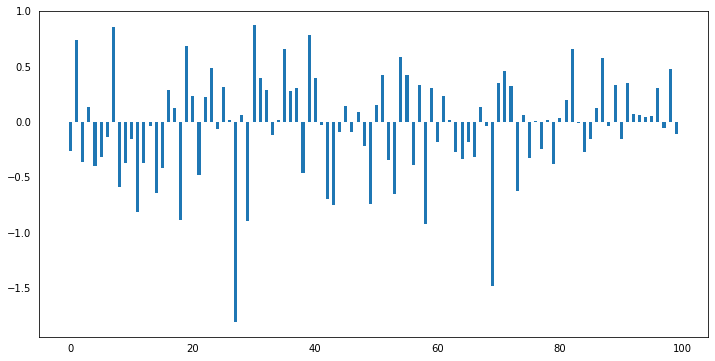

In [365]:
show_tweet(58)

In [374]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC

In [375]:

# the models that you want to compare
models = {
    'clf_randforest': RandomForestClassifier(),
    'clf_knn': KNeighborsClassifier(),
    #'clf_svm': SVC(),
    #'clf_xgb': XGBClassifier(),
    #'clf_ada': AdaBoostClassifier(),
 
}

# the optimisation parameters for each of the above models
params = {
    'clf_randforest':{ 
        'n_jobs': [-1],
        'max_features': ['sqrt'],
        'criterion': ['entropy'],
        'n_estimators': [10, 25, 36, 64],
       
         },
    
    'clf_knn': {
        'weights': [ 'distance'],
        'algorithm': ['ball_tree', 'kd_tree']
         },
    

    

#     'clf_svm' : {
#         'kernel': ['rbf', 'sigmoid'], 
#         'degree' : [1, 2, 3, 4],
        
#         'C': [.01, .1, 1, 10, 100, 1000],
#          },
    
    'clf_xgb' : {
        'objective': ['binary:logistic'],
        'learning_rate': [0.001, 0.05, 0.1],
        'alpha': [0.001, 0.3, 0.05]
        },
        

                   
                 }

In [376]:
def fit_search(X_data, y_data):
        """
        fits the list of models to the training data, thereby obtaining in each 
        case an evaluation score after GridSearchCV cross-validation
        """
        for name in models.keys():
            est = models[name]
            est_params = params[name]
            gscv = GridSearchCV(estimator=est, param_grid=est_params, cv=10)
            gscv.fit(X_data, y_data)
            print("best parameters are: {}".format(gscv.best_estimator_))
            y_pred = gscv.predict(X_data)
            print(classification_report(y_data, y_pred))

In [377]:

import warnings
warnings.filterwarnings('ignore') 
fit_search(X_train, y_train)

best parameters are: RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=64, n_jobs=-1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3024
           1       1.00      1.00      1.00      2262

    accuracy                           1.00      5286
   macro avg       1.00      1.00      1.00      5286
weighted avg       1.00      1.00      1.00      5286

best parameters are: KNeighborsClassifier(algorithm='ball_tree', weights='distance')
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3024
           1       1.00      1.00      1.00      2262

    accuracy                           1.00      5286
   macro avg       1.00      1.00      1.00      5286
weighted avg       1.00      1.00      1.00      5286



In [381]:
logreg = LogisticRegression(n_jobs=1, C=1e3)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.7709620476610768
Testing F1 score: 0.768393867316133


In [334]:
y_train, X_train = vec_for_learning(model_dmm, train_tagged)
y_test, X_test = vec_for_learning(model_dmm, test_tagged)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy %s' % accuracy_score(y_test, y_pred))
print('Testing F1 score: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy 0.6142983230361871
Testing F1 score: 0.6103726871747391


In [384]:
tweets_df

,tokens,index,tweets,target,tweet_tokens
0,"['deed', 'reason', 'earthquake', 'may', 'allah...",0,deed reason earthquake may allah...,1,"[deed, reason, earthquake, may, allah, forgive]"
1,"['forest', 'fire', 'near', 'range', 'canada']",1,forest fire near range canada,1,"[forest, fire, near, range, canada]"
2,"['resident', 'ask', 'shelter', 'place', 'offic...",2,resident ask shelter place offic...,1,"[resident, ask, shelter, place, officer, evacu..."
3,"['people', 'receive', 'wildfire', 'evacuation'...",3,people receive wildfire evacuation ...,1,"[people, receive, wildfire, evacuation, order,..."
4,"['get', 'send', 'photo', 'ruby', 'alaska', 'sm...",4,get send photo ruby alaska sm...,1,"[get, send, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...
7547,"['two', 'giant', 'crane', 'hold', 'bridge', 'c...",7547,two giant crane hold bridge c...,1,"[two, giant, crane, hold, bridge, collapse, ne..."
7548,"['control', 'wild', 'fire', 'california', 'eve...",7548,control wild fire california eve...,1,"[control, wild, fire, california, even, northe..."
7549,"['utc', 'volcano', 'hawaii']",7549,utc volcano hawaii,1,"[utc, volcano, hawaii]"
7550,"['police', 'investigate', 'bike', 'collide', '...",7550,police investigate bike collide ...,1,"[police, investigate, bike, collide, car, litt..."


## train, test = train_test_split(train_df, random_state=42, test_size=0.2)

In [382]:
cores = multiprocessing.cpu_count()
cores

16

In [80]:
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsnescatterplot(model, word, list_names):

    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=50).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))


In [81]:
tsnescatterplot(w2v_model, 'fire', ['earthquake', 'california', 'africabaze'])

KeyError: "Key 'fire' not present"

In [8]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [9]:

# verify shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))

print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))

Test label shape: (1350,)
Train label shape: (5397,)
Test shape: (1350, 1)
Train shape: (5397, 1)


In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

In [133]:
train_X = train_df.filter(['combined_tokens'], axis=1)
train_y = train_df.filter(['target'], axis=1)
# convert target data with labelencoder
train_y= train_y.astype('category')
le = LabelEncoder()   
y = np.array(train_y)

le.fit_transform(y)
y = y.ravel()
# define independent variable
X = train_X
#X = X.reshape(-1,1)
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                     test_size=.2, stratify=y)

X_train, X_test, X_val, X_val = train_test_split(X, y, random_state=42,
                                                     test_size=.1, stratify=y)

C:\Users\root\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [134]:
#(ngram_range=(1,2)
pipeline = Pipeline([ ('vect', CountVectorizer(ngram_range=(1,2))), 
                     ('tfidf', TfidfTransformer(use_idf=True))])
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)



counter = Counter(y_train)
print(counter)

#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X_train)
count_terms = input_dimension[1]
print(count_terms)

Counter({0: 3473, 1: 2617})
1


In [135]:
vocab_size = 5000  # Only consider the top 20k words
num_tokens_per_example = 10  # Only consider the first 200 words of each movie review
X_train = keras.preprocessing.sequence.pad_sequences(
    X_train, maxlen=num_tokens_per_example
)
x_val = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=num_tokens_per_example) 

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [136]:
from tensorflow import keras
